<img src="img/flowchart.png" style="height: 300px">

Aşağıda import edilen module'ler
https://scikit-learn.org/ sitesinden erişelerek bulunabilir. Kullanılan Scikit-learn kütüphaneleri:
- train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- accuracy_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- KNeighborsClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- NeighborhoodComponentsAnalysis: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NeighborhoodComponentsAnalysis.html
- LocalOutlierFactor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
- PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

In [2]:
# Show all columns' names on a large pandas dataframe.
pd.options.display.max_columns = None

# 1-Read Dataset

In [3]:
data = pd.read_csv("data/data.csv")
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


### A) Removing Unnecessary Columns 

In [4]:
data.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1) # axis=1=all col
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### B) Renaming Some Columns

In [5]:
data = data.rename(columns = {"diagnosis" : "target"})
data.head(3)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


- B =   **0** = Benign = İyi Huylu
- M = **1** = Malignant = Kötü Huylu

### C) Converting String Data to Binary Data

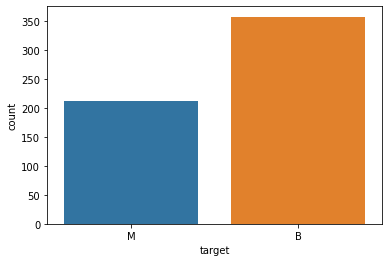

B    357
M    212
Name: target, dtype: int64


In [6]:
sns.countplot(x = data["target"])
plt.show()
print(data.target.value_counts())

- ```i.strip()``` kelimenin/harfin başında ya da sonunda boşluk varsa ortadan kaldırır.
- Örneğin, sütun içerisinde **M** harfine eşit **target** sınıfını 1 yapmak istiyorum.
- Eğer **" M"** ya da **"M "** şeklinde veri içerisiyorsa bunu dönüştürmeyecektir.
- Bu durumun önüne geçmek için ```i.strip()``` ile ilgi sütunun ilgili indexindeki örneğin **" M"** değerini **M** yapar ve bu değeri **1** olarak güncelleyebiliriz. 

In [7]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target]
data.head(3)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### D) Quick Look at Data Information

In [8]:
print("Data shape:", data.shape)

Data shape: (569, 31)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
data.isna().sum() # Yukarıdaki bilgileri onaylarcasına.

target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
describe = data.describe()
describe

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### NOTE
- ```data.isna().sum()```
- Bu kodun olduğu bölümde **missing values** görülememektedir. Bu yüzden missing values düzenlemesi yapılmayacaktır.

Ayrıca yukarıda çalıştırılan **describe**'a göre:
- Farklı sütunlar arasında veriler arasında, örneğin **mean** değerleri arasında çok fazla scale farkı var, kimi çok büyük kimi çok küçük.
- Büyük sayılar küçük sayılara baskın gelebilir, büyük sayıların olduğu feature'a bias'layabilir.
- Bu yüzden **standardization** yapılması gerekir.  

# 2-Data Preprocessing

In [12]:
y = data.target
x = data.drop(["target"], axis = 1)
x_columns = x.columns.tolist()

## A) Outlier
<img src="img/outliers.png" style="height: 350px">

In [13]:
clf = LocalOutlierFactor() # default => n_neighbors=20
y_pred_outlier = clf.fit_predict(x) # if y_pred = -1 => outliers, if y_pred = 1 => inliers(not outliers)
X_score = clf.negative_outlier_factor_ # The opposite LOF of the training samples.

In [14]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [15]:
# threshold
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [16]:
%matplotlib qt5
plt.figure()
plt.scatter(x.iloc[outlier_index, 0], x.iloc[outlier_index,1],color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,0], x.iloc[:, 1], color = "k", s = 3, label = "Data Points")
plt.show()

In [17]:
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min()) #standardazition outlier score
outlier_score["radius"] = radius
outlier_score.head()

,score,radius
0,-1.422440,0.217679
1,-1.066782,0.055159
2,-0.978948,0.015022
3,-1.596933,0.297414
4,-1.069936,0.056600


In [18]:
%matplotlib qt5
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000 * radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [19]:
# drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

## B) Split Data

In [20]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

## C) Standardazation Data

- ```fit()```: Calculate the mean and std to be used for later scaling.
- ```fit_transform()```: Fit to data, then transform it.
- ```transform()```: Perform standardization by centering and scaling.

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train_df = pd.DataFrame(X_train, columns = x_columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train

# 3-Exploratory Data Analysis(EDA)
## A) Correlation Matrix

In [23]:
corr_matrix = data.corr() # String data is discarded in confusion matrix.
corr_matrix.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


In [24]:
# %matplotlib qt5
plt.figure(figsize=(20, 9))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.savefig("correlation_matrix.png")
plt.show()

### NOTE
- Veriyi daha ayrıntılı incelemek istersek **heatmap** yerine **clustermap** tercih edebiliriz.

In [25]:
%matplotlib qt5
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

### NOTE

Yukarıdaki clustermap'e göre 
- **perimeter_mean, radius_mean, area_mean, perimeter_worst, radius_worst, area_worst** featurelarının **target** class'a etkisi yüksek ve değerleri birbirleriyle çok yakındır, kendi aralarında da değerler yüksek ve yakındır.
- Bu yüzden bu ilişkili verilerden yalnızca 1 tanesini kullansak bizim için yeterlidir! :)
- İlişkisi az, çeşitliliği fazla olan featureların train için odaklanırsak daha verimli sonuçlar elde ederiz.

Aşağıda belirli bir **threshold** üzerinde olan verileri inceleyeceğiz.

In [26]:
threshold = 0.70

In [27]:
%matplotlib qt5
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")

## B) Box Plot

In [28]:
data_melted = pd.melt(X_train_df, id_vars = "target", var_name = "features", value_name = "value")

In [29]:
%matplotlib qt5
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

Yukarıdaki plota göre:
- Veriseti istenilen başarıda değilse , bazı uç **outlier**ları da drop etmemiz gerekebilir.
- **radius_mean** sütununda target sınıfı yani 0 ve 1 değerleri net bir şekilde farklı değerlerde dağılmış. Bu feature bizim için anlamlı bir feature.
- Eğer feature extraction yapılması istenirse bu featureu kullanabiliriz.
- Bu gibi birçok feature var, biz bir tanesini örnek verdik.
- Ya da **smoothness_se** sütununda target sınıfı yani 0 ve 1 değerleri birbirine çok yakın değerlerde dağılmış. Bu feature bizim için anlamlı bir feature değil.
- Bu feature target sınıfını belirlemede kullanamayız! :)

## C) Pair Plot

In [30]:
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

# 3-KNN Model
<img src="img/knn.png" style="height: 200px">

### A) Create Model

In [31]:
knn = KNeighborsClassifier(n_neighbors = 2) # default=5

### B) Train Data

In [32]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

### C) Test Data

In [33]:
y_pred = knn.predict(X_test)

In [34]:
# ilk 10 eleman kontrol edildi. Örneğin 3. index 0 olması gerekirken, 1 tahmini yapılmış.
#  Tüm verinin kontrolü Evauluate model kısmında yapılacaktır.
print('Real Data     :', Y_test[0:10])
print('Predicted Data:', y_pred[0:10])

Real Data     : [1 0 0 0 0 0 0 0 1 0]
Predicted Data: [1 0 0 1 0 0 0 0 1 0]


### D) Evaluate Model

In [35]:
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test) # accuracy ile farkı yok
print("CM:\n", cm) # sol taraftaki eksenler real, üst taraftaki predict'ler
print("Basic KNN Acc:", acc)
print("Score        :", score) 

CM:
 [[108   1]
 [  7  55]]
Basic KNN Acc: 0.9532163742690059
Score        : 0.9532163742690059


Yukarıdaki confision matrixe göre:
- ilk satırda **109** tane **iyi huylu (0)** target var. **108** tanesini **doğru**, **1** tanesini **yanlış** **predict** etmiş.
- ikinci satırda **62** tane **kötü huylu (1)** target var. **7** tanesini **yanlış**, **55** tanesini **doğru** **predict** etmiş.
- Toplam 8 yanlış predict'ten kaynaklı **%95** bir **accuracy** var.

# 4-Choose Best KNN Parameters
<img src="img/knn2.png" style="height: 350px">

In [36]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_options = list(range(1, 31)) # k = {1, 2, .. 29, 30} # n_neighbors
    weight_options = ["uniform", "distance"] # weights
    p_options = list(range(1, 11)) # k = {1, 2, .. 9, 10} # p=1=>manhattan_distance, p=2=>euclidean_distance
    print()
    param_grid = dict(n_neighbors = k_options, weights = weight_options, p = p_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) # 2. kötü yöntem
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test:\n", cm_test)
    print("CM Train:\n", cm_train)
    
    return grid
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best training score: 0.9696153846153847 with parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:
 [[106   3]
 [  4  58]]
CM Train:
 [[247   1]
 [  8 141]]


### NOTE
Yukarıdaki sonuca göre,
- Train Score, test score'undan %2 daha büyük çıkmış.
- Burada bir fark çok büyük olmadığı için **overfitting(ezberleme)** söz konusu sayılmaz(good balance)
- Train data error ~= %2
- Test data  error ~= %4
- Amaç: Train error % 1, Test error %1.5 olsun =>Good Balance => low bias, low variance
Train ve test oranlarını eşitlemek için:
- Model Complexity'yi birazcık azaltabiliriz.
- Bu durumda train oranının doğal olarak, azcık düşmesini test ile eşitlenmesini bekleriz.

# 5-Principal Component Analysis - PCA

- Zaman kısıtı varsa PCA kullanarak veri boyutu çok fazla ise verideki feature sayısını düşürebiliriz.
- Bizim verimiz az peki PCA niçin kullanıyoruz?
  - Birincisi öğrenmek için,
  - İkincisi 30 featureu anlayabilmek için görselleştirmesi gerekir, PCA bunu sağlıyor.
  - 30 sütun 2 sütuna düşürülecek.

In [37]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [39]:
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"]) # 2 column'a düşürülüyor.
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")
plt.show()

### 
- Bazı noktalarda kaybedilen veriler var, bunlar birbirine karışmış. Bunları daha sonra kurtarmaya çalışacağız.
- Şimdi PCA ile train edilecek.

In [40]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

In [41]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca) 


Best training score: 0.9444871794871794 with parameters: {'n_neighbors': 9, 'p': 3, 'weights': 'uniform'}

Test Score: 0.9298245614035088, Train Score: 0.947103274559194

CM Test:
 [[104   5]
 [  7  55]]
CM Train:
 [[241   7]
 [ 14 135]]


### Note
- Yukarıdaki sonuçlara göre, sütun sayısı 2ye düşürüldüğünden ve verilerde iç içe girme durumundan dolayı, accuracy sonuçları haliyle azalmıştır.
- Ancak %2 lik bir azalma fena değildir.

In [42]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

In [43]:
h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [44]:
Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

In [50]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()      

# 6-Neighbourhood Components Analysis(NCA)

### A) Create NCA Model

In [51]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)

sklearn.neighbors._nca.NeighborhoodComponentsAnalysis

In [53]:
nca.fit(x_scaled, y) # unsupervised değildir. target variable'a ihtiyaç duyar.

NeighborhoodComponentsAnalysis(n_components=2, random_state=42)

In [54]:
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1", "p2"]) # verisetini dataframe'e yerleştiririz.
nca_data["target"] = y

In [60]:
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")
plt.show()

### B-Split Data for NCA

In [61]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

### C) Train Data for NCA

In [62]:
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score: 0.9898717948717948 with parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:
 [[108   1]
 [  0  62]]
CM Train:
 [[248   0]
 [  0 149]]


### D) Visualize Data for NCA

In [63]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

In [65]:
h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [66]:
Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

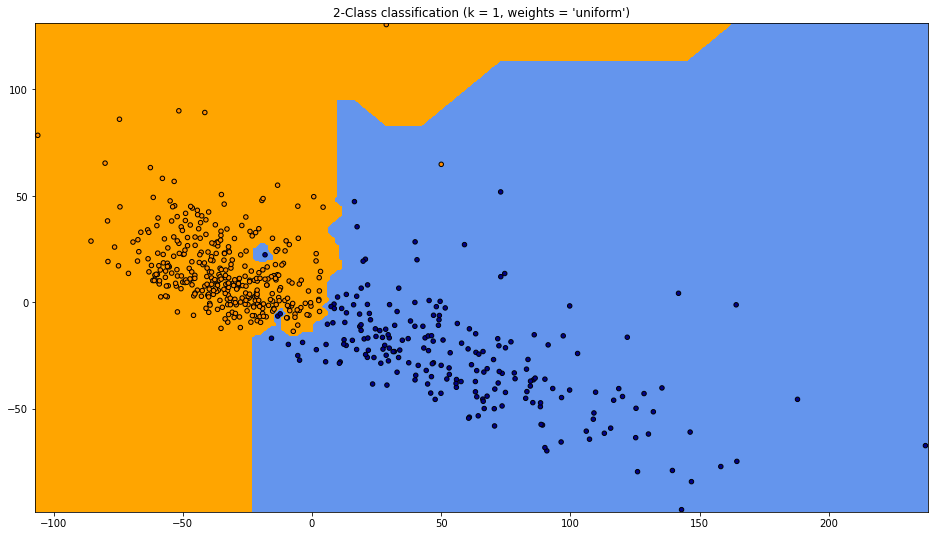

In [70]:
%matplotlib inline
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))
plt.savefig("result accuracy with nca")
plt.show()

Yukarıdaki plota göre:
- Yüzde 99 luk bir test sonucumuz vardır. 
- Bu da mükemmel bir sonuçtur. 
- NCA'nın önemi büyüktür.

### E) Find Wrong Decision
- Best parametreye baktığımızda n=1 çıkmıştı. Bu mantıklı değil, çünkü overfitting olduğu anlamına geliyor.
- Ancak test verisi %99 başarı oranı olduğu için bir sıkıntı yaratmaz.

In [71]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

0.9941520467836257

In [72]:
test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

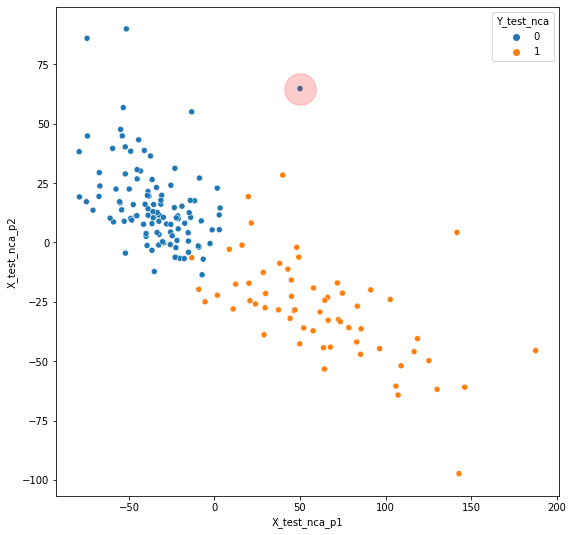

In [77]:
plt.figure(figsize=(9,9))
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)
plt.show()